# Praktikum V

Selamat datang pada praktikum unggulan minggu ke - 5. 


![1_L0464qoX7pSkIQMBcF73Tg.png](attachment:1_L0464qoX7pSkIQMBcF73Tg.png)

Gambar diatas menunjukkan tahapan yang Anda perlu lakukan ketika ingin membangun sebuah model artificial intelligence. 
Pada minggu ini Anda akan melakukan fase data cleansing atau pembersihan data. Tahapan ini biasanya dilakuakan sebelum anda melakukan tahapan EDA yang telah Anda pelajari sebelumnya. Tahapan ini perlu dilakukan jika data yang Anda miliki tidak 'bersih', sehingga perlu dilakukan pemrosesan terlebih dahulu (tahapan pre-processing) sebelum data tersebut masuk kedalam algoritma pembangunan model. 

Materi praktikum ini dibagi menjadi 2 bagian dengan menggunakan dua dataset yang berbeda. Adapun operasi akan Anda lakukan antara lain 
* Melihat bentuk data (shape) dari data train dan test set
* Cek data NaN, bila ada maka hapus/drop data NaN tsb
* Cek outliers, bila ada maka hapus/drop outliers tsb
* Melakukan konversi jenis kolom yang relevan.
* Melakukan transformasi terhadap data yang bersifat kategori 

Operasi yang Anda lakukan pada tahapan pembersihan data sangat bergantung pada karakteristik permasalahan, karakter data, serta jenis data yang terdapat dalam dataset Anda. Sebagai referensi, berikut bagan dari berbagai macam tipe data yang mungkin Anda temui dalam sebuah dataset. 




![8UUywzzaMhY2ZGHrWE7VkA_b.png](attachment:8UUywzzaMhY2ZGHrWE7VkA_b.png)

In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Dari hasil diatas data test ternyata tidak memiliki missing values

### Dataset 2

Dataset yang akan Anda gunakan pada bagian ini adalah data sensus penduduk. Dataset ini memiliki jumlah sebanyak 48842 data dengan 15 fitur. 

In [2]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [3]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv", na_values="?" )
print('Number of rows: '+ format(data.shape[0]) +', number of features: '+ format(data.shape[1]))

Number of rows: 48842, number of features: 15


In [4]:
# menghasilkan jumlah baris dan jumlah kolom (bentuk data) pada data train dengan fungsi .shape
data.shape

(48842, 15)

In [5]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
# fungsi describe() untuk mengetahui statistika data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


##### 1. Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2.

In [7]:
#cek nilai yang hilang / missing values di dalam data train
data.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

#### Dari hasil diatas data test ternyata memiliki missing values

In [8]:
#drop/hapus data missing values
data = data.drop(data[data.isnull().any(1)].index, axis = 0)

In [9]:
data.shape

(45222, 15)

In [10]:
## mengecek apakah terdapat nilai NA pada dataset

C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (data.dtypes == 'int64') 
Float   = (data.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


#### 2. Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?

In [11]:
data.race.unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

In [12]:
## Kode untuk melakukan transformasi untuk kolom race dengan fungsi maping

race_map  = {'Black':0,'White':1,'Amer-Indian-Eskimo':2, 'Asian-Pac-Islander':3,'Other':4}

data['race_encoded'] = data['race'].map(race_map)
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_encoded
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,1
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,1
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,1
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,1
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,1


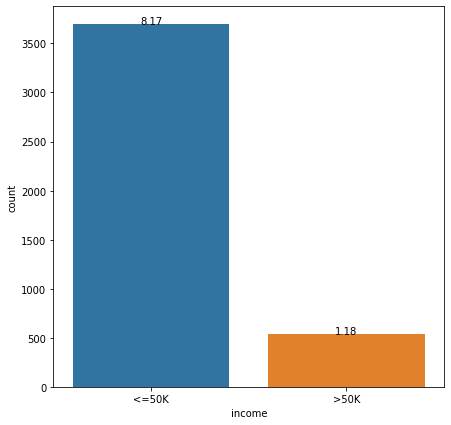

In [13]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data[data["race_encoded"]==0])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

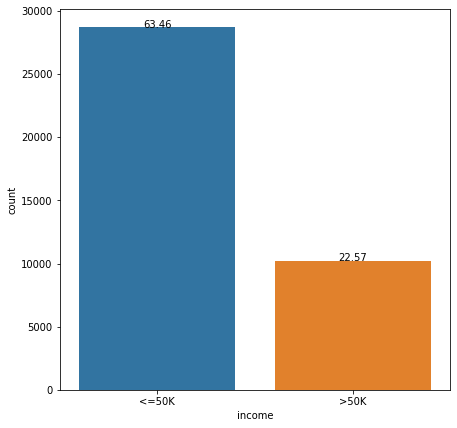

In [14]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data[data["race_encoded"]==1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

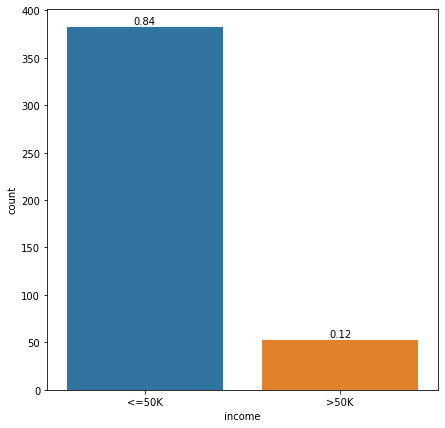

In [15]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data[data["race_encoded"]==2])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

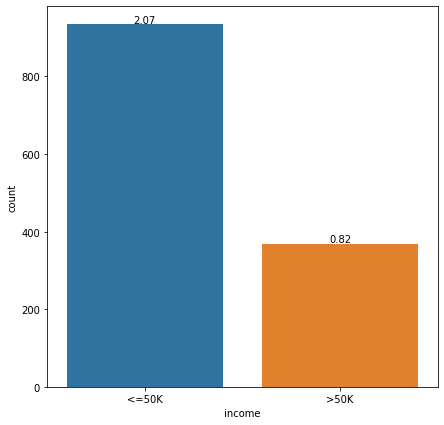

In [16]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data[data["race_encoded"]==3])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

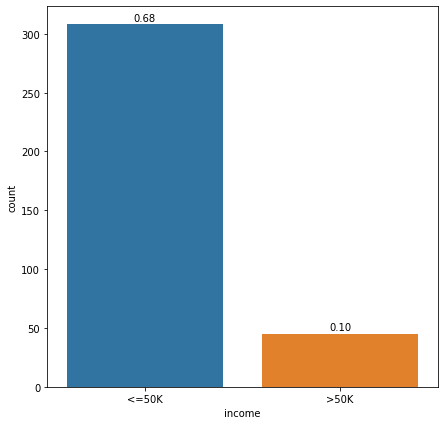

In [17]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data[data["race_encoded"]==4])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### 3. Ganti kolom hours-per-week dengan nama hoursPerWeek

In [18]:
#### 2. Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?##melakukan proses rename kolom
dataRename = data.rename(columns={'hours-per-week': 'hoursperweek'})
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hoursperweek,native-country,income,race_encoded
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,1


#### 4. Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?  

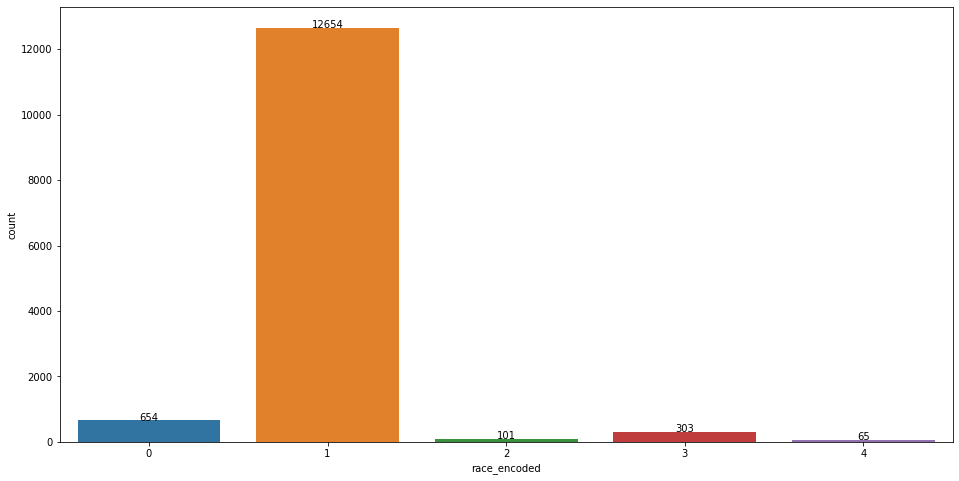

In [19]:
fig, ax1 = plt.subplots(figsize=(16,8))
graph = sns.countplot(ax=ax1,x='race_encoded', data=dataRename[dataRename["hoursperweek"]>40])

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
plt.show()

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2. 
* Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?
* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?  

### Instruksi Praktikum mahasiswa Teknik Industri, Teknik Mesin, Agroteknologi, dan FTSP

* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Lakukan analisis histogram pada kolom hoursPerWeek pada setiap data race1, race2, race3, race4 dan race5. Informasi apa yang dapat Anda simpulkan ?
* Terdapat berapa kategori data yang mengisi kolom workclass? Apa saja kategori yang ada?
* Jelaskan hasil boxplot yang diperoleh untuk data income dan umur untuk data race1 !